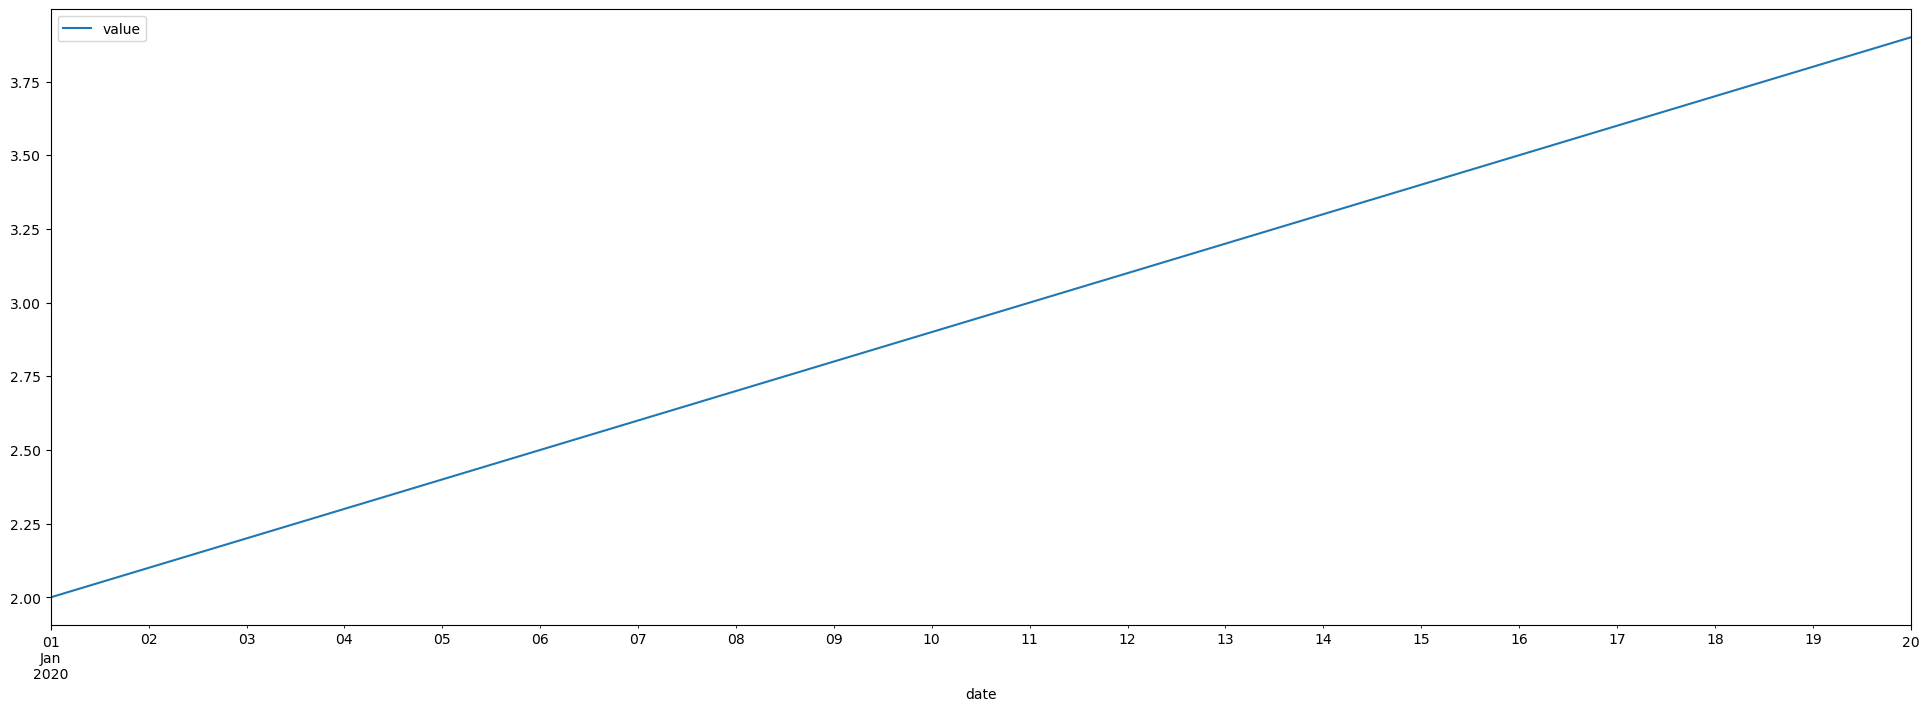

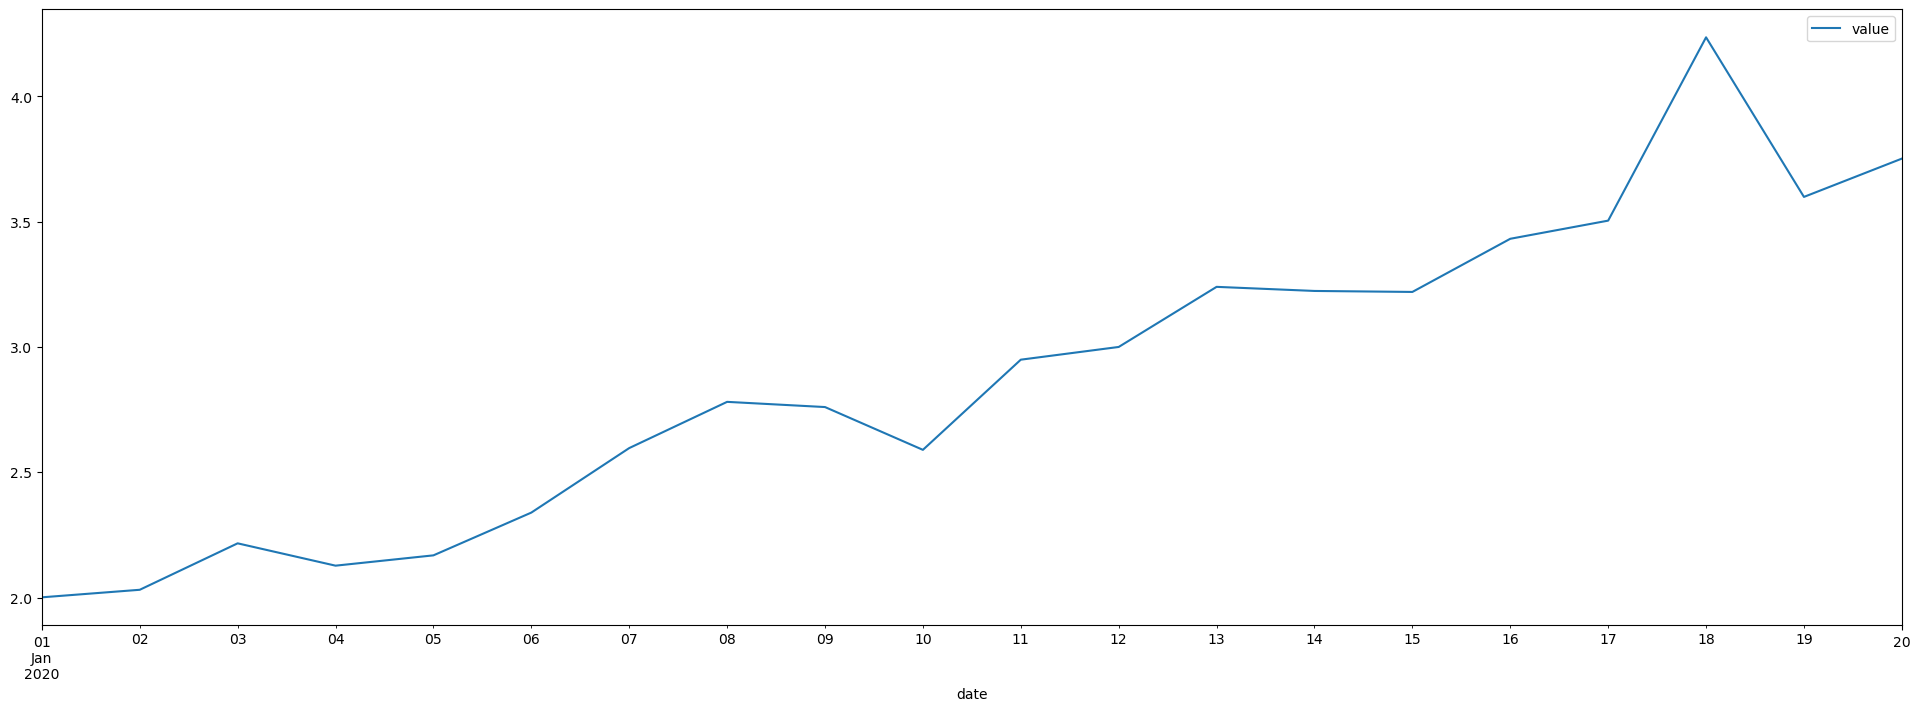

In [2]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
import pandas as pd

# setting up a linear tren
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()

## examples/generate_stationary_process.ipynb

We want to be able to generate synthetic timeseries data to test and compare our algorithms. In order to have some control over the trends in the timeseries, we use the simple package timeseries generator in this repository.

In [3]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
import pandas as pd

%matplotlib inline

We can now start by setting up a linear trend. Trends are collected in a generator, which takes any dependent variables as features and the trends you have added to compose the time-series dataframe.

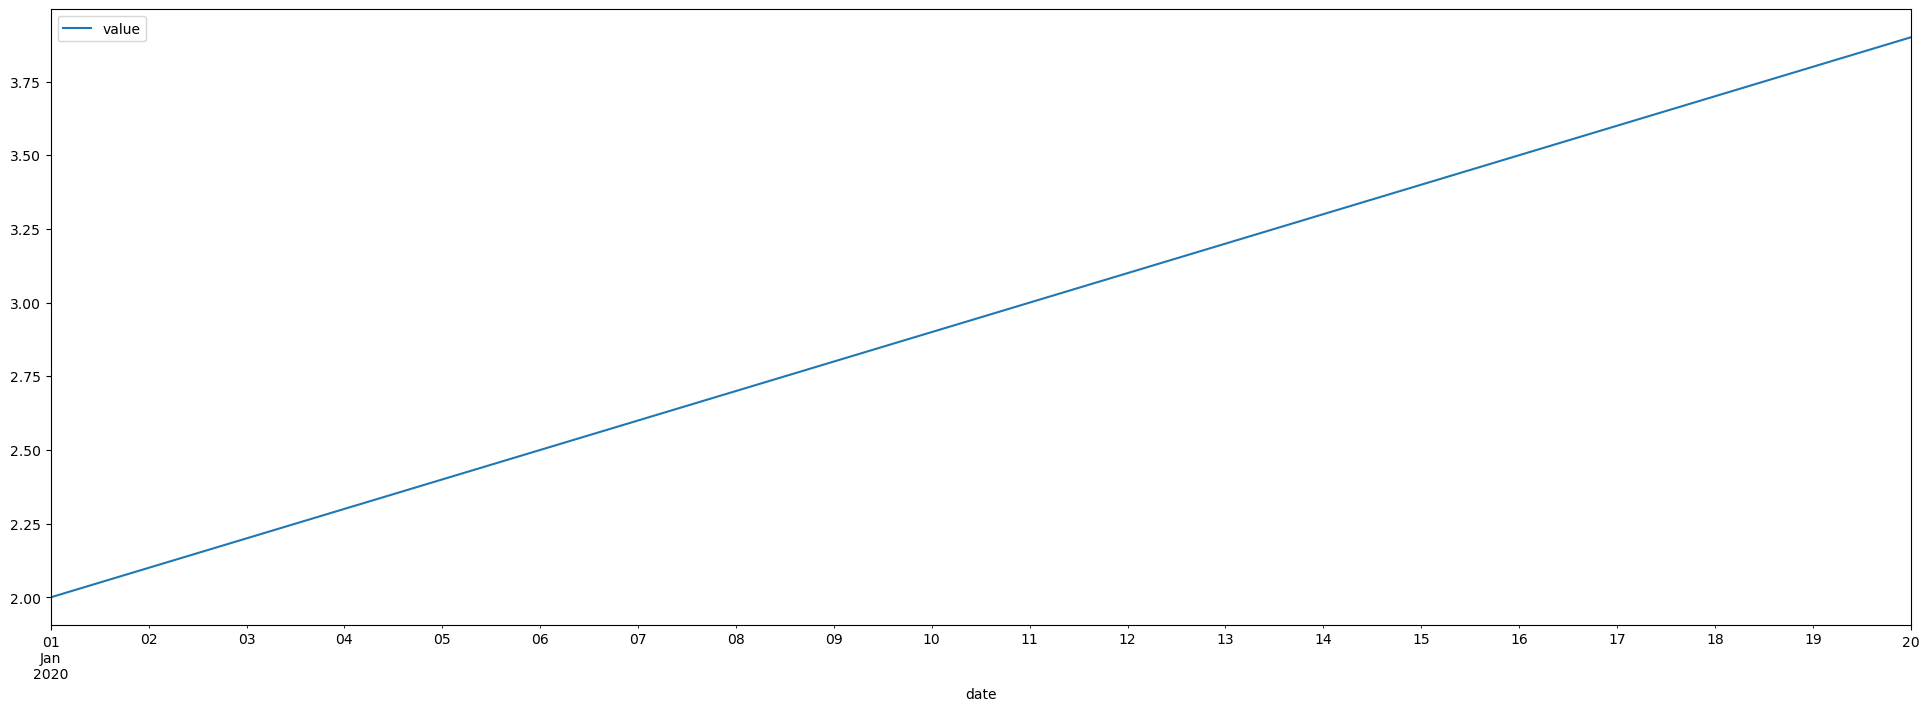

In [4]:
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")

g: Generator = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()

We can update our package by adding some white noise to the generator. The white noise adds noise with a standard deviation as a fraction of the total value to our timeseries.

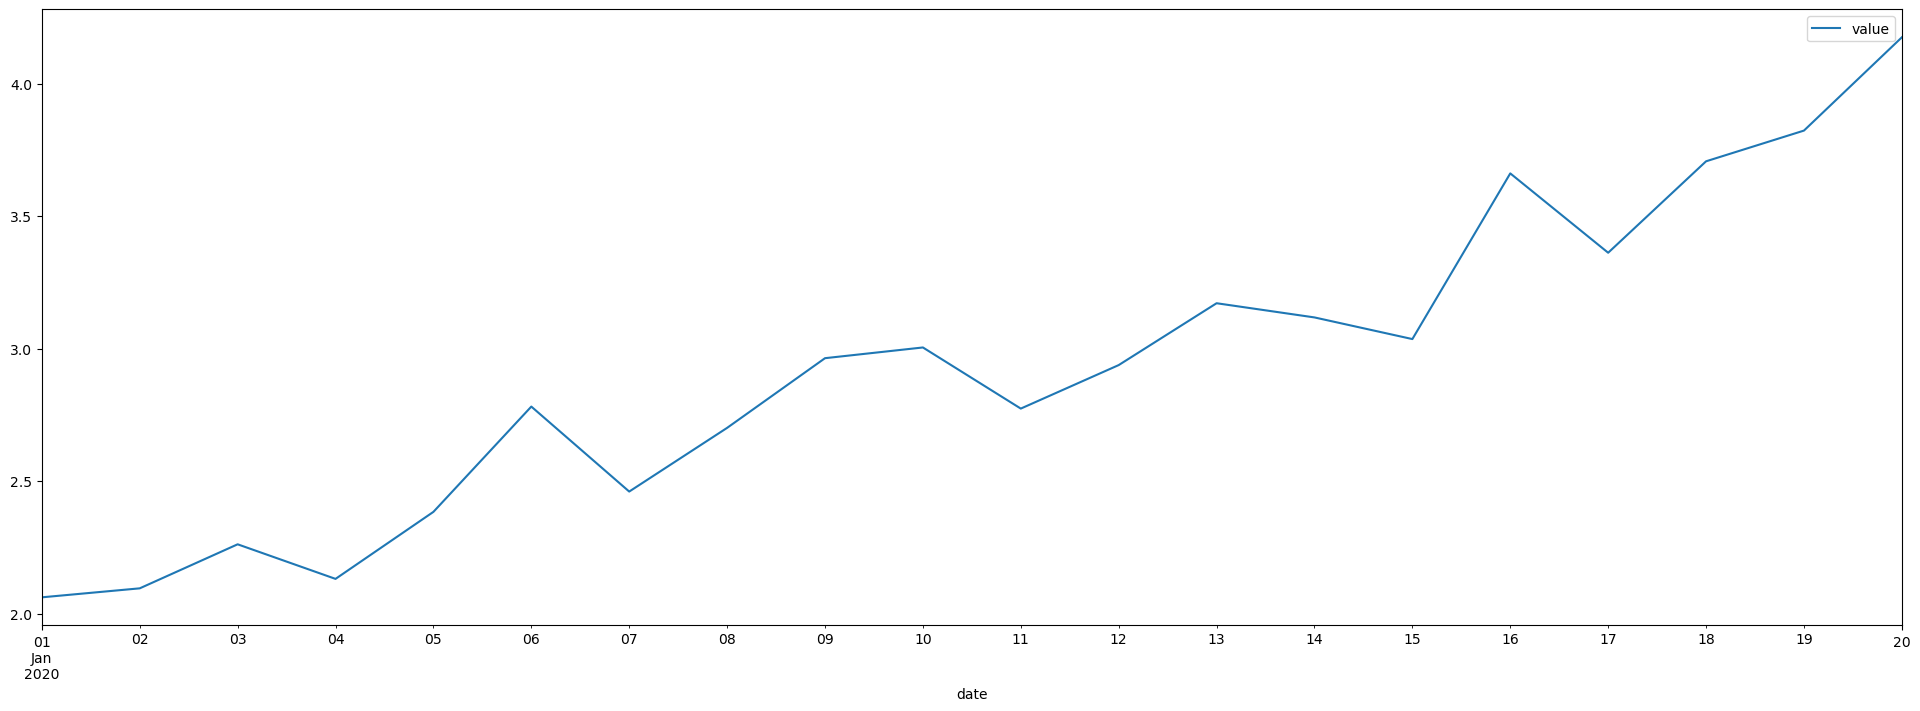

In [5]:
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()

We can add dependent feature columns to our timeseries. In this case, we introduce a random factor to these features. This factor will be dependent on a feature that we introduce to the generator.

In [6]:
rff = RandomFeatureFactor(
    feature="my_feature",
    feature_values=["feature1", "feature2"],
    min_factor_value=1,
    max_factor_value=10
)
g.update_factor(rff)
g.features = {"my_feature": ["feature1", "feature2"]}
df: pd.DataFrame = g.generate()
print(df.head(5))

        date my_feature  base_amount  random_feature_factor  my_linear_trend  \
0 2020-01-01   feature1          1.0               6.104779              2.0   
1 2020-01-01   feature2          1.0               7.960708              2.0   
2 2020-01-02   feature1          1.0               6.104779              2.1   
3 2020-01-02   feature2          1.0               7.960708              2.1   
4 2020-01-03   feature1          1.0               6.104779              2.2   

   white_noise  total_factor      value  
0     0.978912     11.952087  11.952087  
1     1.014159     16.146846  16.146846  
2     1.035850     13.279631  13.279631  
3     0.917396     15.336556  15.336556  
4     0.926358     12.441458  12.441458  


The resulting dataframe is a dataframe with all the features and factors influencing the features. We can plot the final value per product.

<AxesSubplot:xlabel='date'>

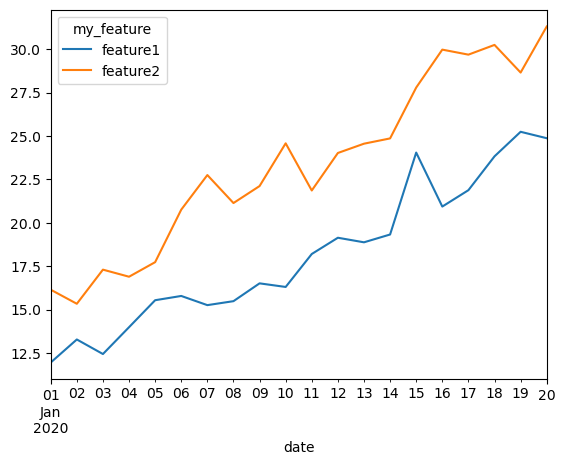

In [7]:
df_plot=df.set_index('date')
df_plot[["my_feature", "value"]].pivot(columns=["my_feature"], values="value").plot()

We can also add different linear trends for different feature values.

<AxesSubplot:xlabel='date'>

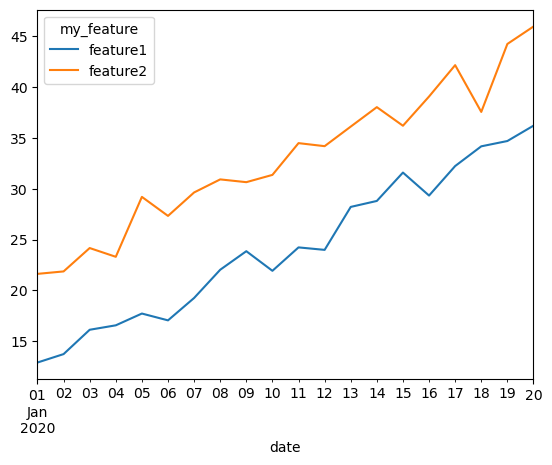

In [8]:
lt2 = LinearTrend(feature="my_feature", feature_values={
    "feature1": {"coef": 1., "offset": 1.},
    "feature2": {"coef": 0.05, "offset": 1.}
})

g.update_factor(lt2)
df = g.generate()

df_plot=df.set_index('date')
df_plot[["my_feature", "value"]].pivot(columns=["my_feature"], values="value").plot()

## examples/use_external_factors.ipynb

### External Factors
The timeseries generator also supports using a few external factors that are publicly available, to give your dataset a more "real world" look. In this notebook, we show how these external factors can be used

In [9]:
from pandas._libs.tslibs.timestamps import Timestamp
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor
from timeseries_generator import Generator, HolidayFactor, RandomFeatureFactor, SinusoidalFactor, WeekdayFactor, WhiteNoise

import pandas as pd

The first component that we have is the Country GDP factor. This gives a factor based on the GDP of the countries involved. The following snippet shows an example of the resulting dataframe. By default it uses the countries Italy, Netherlands and Romania.

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='date'>)

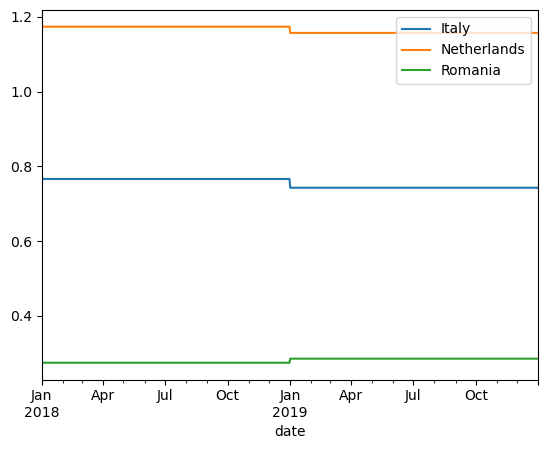

In [10]:
start_date = Timestamp("01-01-2018")
end_date = Timestamp("01-01-2020")

c_gdp_factor = CountryGdpFactor()
c_gdp_factor.plot(start_date=start_date, end_date=end_date)

Another built-in factor is the `EUIndustryProductFactor`. This factor creates a factor based on the industry product factor based on public data of the ECB (European Central Bank) This data is unique per year over the whole of Europe.

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='date'>)

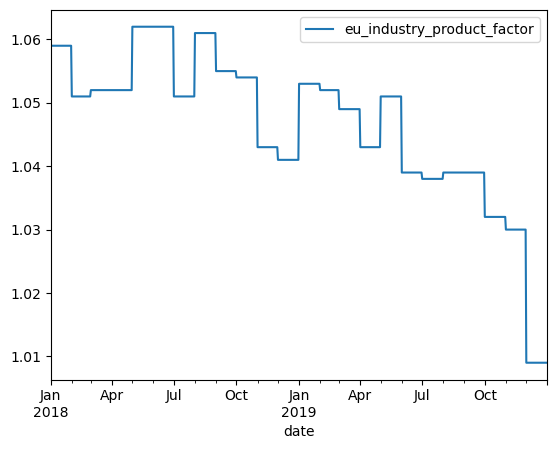

In [11]:
eu_industry_product_factor = EUIndustryProductFactor()
eu_industry_product_factor.plot(start_date=start_date, end_date=end_date)

Holidays play a large role in sales of consumer products. We therefore included a holiday factor which makes use of the excellent `workalendar` package. You can enter a holiday factor, and include special holidays. In this case, Christmas gets a custom factor. We smooth the factors here, as we know that not all presents get bought on the same day.

In [12]:
holiday_factor = HolidayFactor(
    holiday_factor=2.,
    special_holiday_factors={
        "Christmas Day": 10.
    }
)
holiday_factor.plot(start_date=start_date, end_date=end_date)

ImportError: Missing optional dependency 'scipy.signal'. Scipy is required to generate window weight. Use pip or conda to install scipy.signal.

Sales are also expected to rise during the weekends. For these kinds of usecases, we have included the WeekdayFactor. This factor also works with the workalendar package. You can give different days of the week different factors:

In [ ]:
weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.15, 5: 1.3, 6: 1.3}  # Here we assign a factor of 1.15 to Friday, and 1.3 to Sat/Sun 
)
weekday_factor.plot(start_date=start_date, end_date="01-31-2018")  # Using a smaller timerange here to keep the plot viewable

Different products have different sales numbers. The same holds for different stores. Here, this is simulated by using a random factor for both our different stores and our different products.

In [ ]:
feature_store_random_components = RandomFeatureFactor(
    feature_values=["store1", "store2", "store3"],
    feature="store",
    col_name="random_store_factor"
)
feature_store_random_components.plot(start_date=start_date, end_date=end_date)

feature_product_random_components = RandomFeatureFactor(
    feature_values=["winter jacket", "Yoga Mat", "basketball top"],
    feature="product",
    col_name="random_product_factor"
)
feature_product_random_components.plot(start_date=start_date, end_date=end_date)

Not all products sell the same amount all year long. We simulate this by introducing a sinusoidal factor working on both the winter jacket and basketball top products. Ny using a wavelength of a year and different phases (unit here is in days) we simulate summer and winter sales.

In [ ]:
product_seasonal_components = SinusoidalFactor(
    feature="product",
    col_name="product_seasonal_trend_factor",
    feature_values={
        "winter jacket": {
            "wavelength": 365.,
            "amplitude": 0.2,
            "phase": 365/4,
            "mean": 1.
        },
        "basketball top": {
            "wavelength": 365.,
            "amplitude": 0.2,
            "phase": 0.,
            "mean": 1.
        }
    }
)
product_seasonal_components.plot(start_date=start_date, end_date=end_date)

We add some noise to the dataset. In this case, we add Gaussian White Noise.

In [ ]:
white_noise = WhiteNoise()
white_noise.plot(start_date=start_date, end_date=end_date)

Now that we have viewed each of the different components, we can add them together in the generator to obtain the synthetic timeseries.

In [ ]:
features_dict = {
        "country": ["Netherlands", "Italy", "Romania"],
        "store": ["store1", "store2", "store3"],
        "product": ["winter jacket", "Yoga Mat", "basketball top"]
    }
g: Generator = Generator(
    factors={
        c_gdp_factor,
        eu_industry_product_factor,
        holiday_factor,
        weekday_factor,
        feature_store_random_components,
        feature_product_random_components,
        product_seasonal_components,
        white_noise
    },
    features=features_dict,
    date_range=pd.date_range(start=start_date, end=end_date),
    base_value=10000
)
    
df = g.generate()
    
plot_df = df.set_index('date')
plot_df[['country', 'store', 'value', 'product']].pivot(columns=['country', 'store', 'product'], values='value').plot(figsize=(24,8))


### Export the dataset

df_export = df.drop(axis=1, columns=['base_amount']) df_export.to_csv('synthetic_data.csv', index=False, header=True)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from collections import defaultdict

checkbox_feat_dict = features_dict.copy()

# create checkbox widgets
checkbox_dict = {}
vbox_l = [] 
for feat, feat_vals in checkbox_feat_dict.items():
    hbox_l = []
    for val in feat_vals:
        desc = f'{feat}|{val}'
        cb_widget = widgets.Checkbox(
                value=False,
                description=desc,
                disabled=False
            )
        hbox_l.append(cb_widget)
        checkbox_dict[desc] = cb_widget
    vbox_l.append(widgets.HBox(hbox_l))

ui = widgets.VBox(vbox_l) 

all_feat_l = list(checkbox_feat_dict.keys())

selected_feat = []
def plot_select_feat(**kwargs):
    selected_feat.clear()

    for key in kwargs:
        if kwargs[key] is True:
            selected_feat.append(key)
    
    if len(selected_feat) > 0:
        # filter dataframe by selected checkbox
        feat_sel_l = [(s.split('|')[0], s.split('|')[1]) for s in selected_feat]

        #------------------------
        # get the conditions
        feat_dict = defaultdict(list)
        for col, cond in feat_sel_l:
            feat_dict[col].append(cond)
        
        # get `or` conditions for checkbox in the same group, e.g., store=store1 or store2
        cond_str_l = []
        for col, val_l in feat_dict.items():
            or_cond = " | ".join([f"(df['{col}'] == {repr(val)})" for val in val_l])
            cond_str_l.append(or_cond)
        
        # get `and` condidtion for checkbox in differetn group
        conditions = " & ".join([f'({cond})' for cond in cond_str_l])
        #--------------------------

        df_sel = df[eval(conditions)]
        
        # get pivot table
        df_sel = df_sel.set_index('date')
        df_plot = df_sel[all_feat_l + ['value']].pivot(columns=all_feat_l, values='value')
        
        df_plot.plot(figsize=(24,8))
    
    

out = widgets.interactive_output(plot_select_feat, checkbox_dict)
display(ui, out)